# Final Project DTS FGA Big Data Analytics
oleh hidayat abdul rouf

## Dataset
dataset adalah data cuaca di <b>Szeged, Hungary</b> tahun 2006-2016, data diperolah dari https://www.kaggle.com/budincsevity/szeged-weather/data# Dataset ini berisi tentang informasi cuaca jam dan harian Szeged mulai dari 1 Januari 2006 hingga 31 Desember 2016.
Dataset ini memiliki fitur-fitur, antara lain:
<ul>
    <li>time : tanggal dan waktu pengambilan data </li>
    <li>summary : type cuaca saat itu </li>
    <li>precipType : tipe hujan/tidak</li>
    <li>temperature : suhu saat itu dalam celcius</li>
    <li>apparentTemperature : suhu rasa saat itu dalam celcius </li>
    <li>humidity : kelembabab saat itu </li>
    <li>windspeed : kecepatan anggin pada saat itu (Km/H)</li>
    <li>windBearing : arah angin saat itu dalam degrees</li>
    <li>visibility : jarak pandang dalam km</li>
    <li>loudCover : langit tertutup awan</li>
    <li>presure : tekanan pada saat itu</li>
<ul>

In [1]:
# load dataset

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

fileFo = "weatherHistory.csv"
data = pd.read_csv(fileFo)

nRow, nCol = data.shape
print(f'"Szeged, Hungary tahun 2006-2016" memiliki {nRow} baris and {nCol} kolom')

data.head()

"Szeged, Hungary tahun 2006-2016" memiliki 96453 baris and 12 kolom


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 7.4+ MB


# Preprocessing
preprocessing pertama adalah dengan mengubah data yang berada pada kolom 'Formatted Date' dari string menjadi format python datetime. Hal ini dilakukan karena dataset ini berjenis time-series dataset, dimana data "waktu" digunakan sebagai fitur yang menjadi acuan dalam time-series dataset.

In [3]:
import datetime
tanggal = []
dataprepro = data
for tgl in data['Formatted Date']:
    temp = datetime.datetime.strptime(tgl, '%Y-%m-%d %H:%M:%S.%f %z')
    tanggal.append(temp)

dataprepro['Formatted Date'] = tanggal
dataprepro.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


kemudian menghapus kolom attribut Loud Cover, karena pada kolom ini semua data berisi 0 sehingga keberadaannya tidak memiliki korelasi dengan attribut lain yang artinya tidak dapat untuk ditarik kesimpulan tertentu. Kemudian menangani masalah missing value dengan menghapus baris yang terdapat mssing value. lalu menempatkan kolom 'Formatted Date' sebagai indeks

In [4]:
# dataprepro = dataprepro.drop('Loud Cover', 1)
dataprepro = dataprepro.dropna()
print("Ukuran data (baris, kolom):", dataprepro.shape)
dataprepro.head()
dataprepro.set_index('Formatted Date', inplace=True)
dataprepro.head()

Ukuran data (baris, kolom): (95936, 12)


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


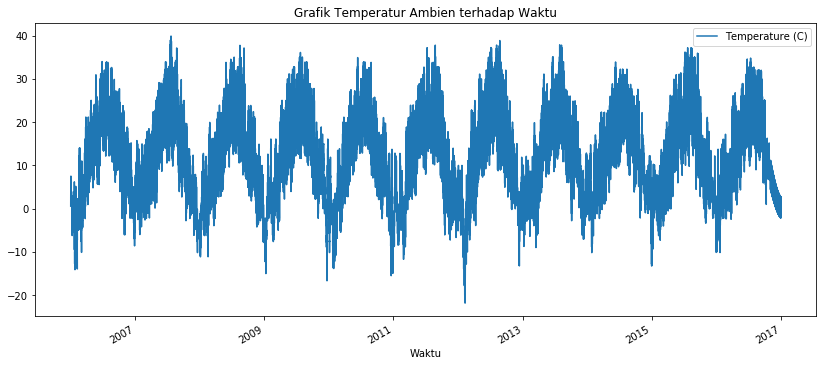

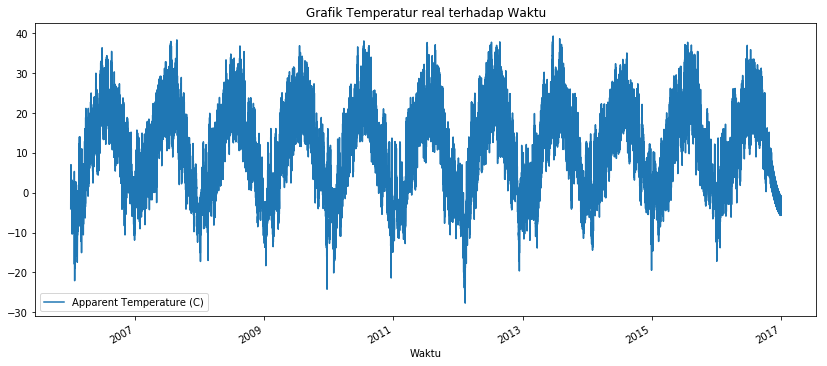

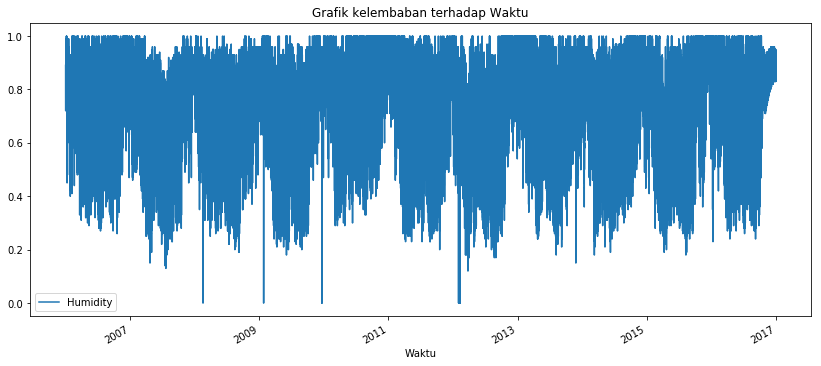

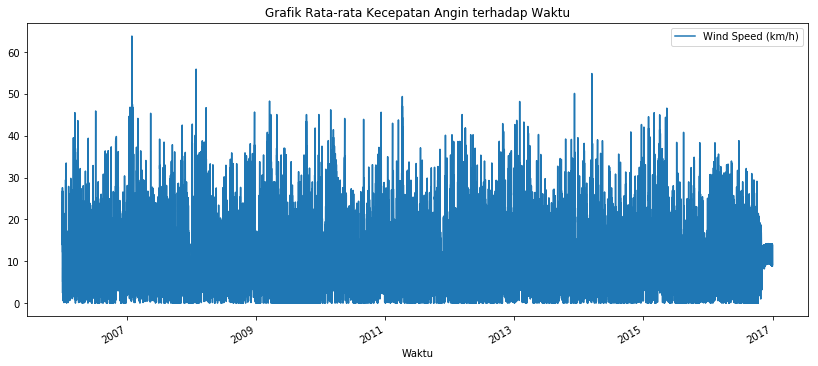

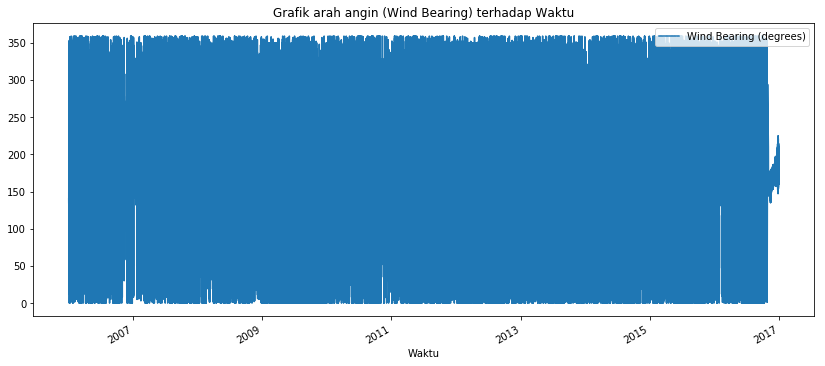

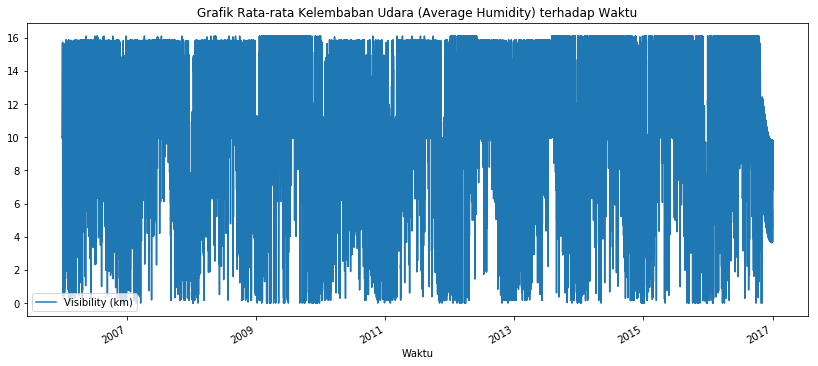

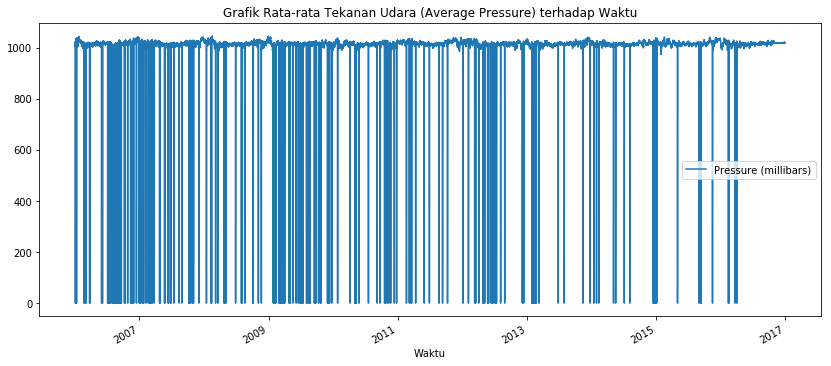

In [6]:
import matplotlib.pyplot as plt

# temperatur ambien terhadap Waktu
dataprepro[['Temperature (C)']].plot(figsize=(14,6))
plt.title('Grafik Temperatur Ambien terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# temperatur real terhadap Waktu
dataprepro[['Apparent Temperature (C)']].plot(figsize=(14,6))
plt.title('Grafik Temperatur real terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# kelembabab terhadap Waktu
dataprepro[['Humidity']].plot(figsize=(14,6))
plt.title('Grafik kelembaban terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# kecepatan angin terhadap Waktu
dataprepro[['Wind Speed (km/h)']].plot(figsize=(14,6))
plt.title('Grafik Rata-rata Kecepatan Angin terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# arah angin terhadap Waktu
dataprepro[['Wind Bearing (degrees)']].plot(figsize=(14,6))
plt.title('Grafik arah angin (Wind Bearing) terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# jarak pandang terhadap Waktu
dataprepro[['Visibility (km)']].plot(figsize=(14,6))
plt.title('Grafik Rata-rata Kelembaban Udara (Average Humidity) terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# tekanan terhadap Waktu
dataprepro[['Pressure (millibars)']].plot(figsize=(14,6))
plt.title('Grafik Rata-rata Tekanan Udara (Average Pressure) terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

setiap awal tahun, ada lompatan besar. Juga, tampaknya ada tren (trends): tampaknya naik sedikit, lalu turun, kembali naik dan turun kembali. Dengan kata lain, sepertinya ada tren dan komponen musiman untuk rangkaian waktu tersebut.

### Korelasi
mencari korelasi antara attribut dapat menggunakan scatter plot

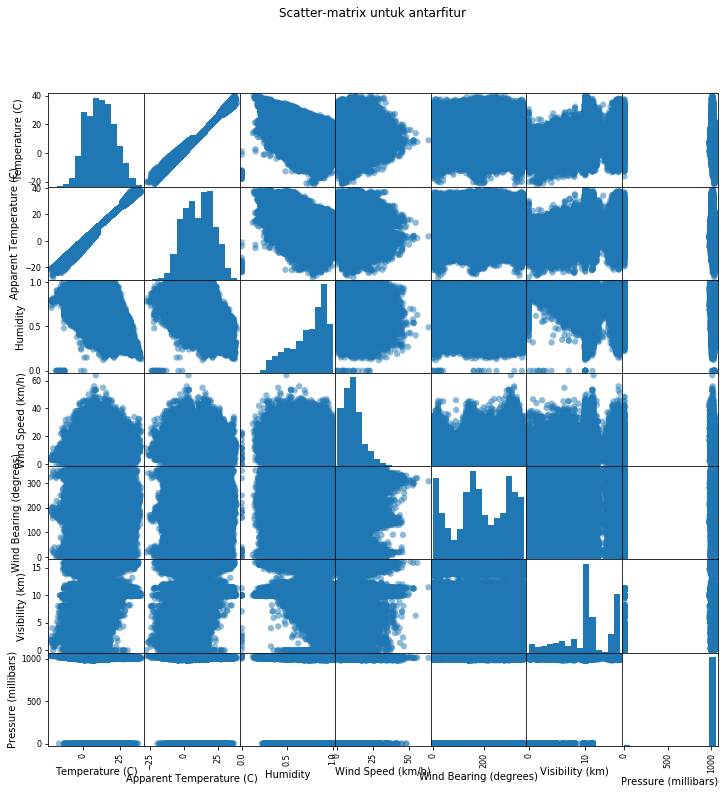

In [82]:
## visualisasi korelasi antarfitur

# import
from pandas.plotting import scatter_matrix
from matplotlib import cm
import matplotlib.pyplot as plt

X = dataprepro[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
Y = dataprepro[['Daily Summary']]

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, marker='o', s=40,
                        hist_kwds={'bins':15}, figsize=(12,12),
                        cmap=cmap)

plt.suptitle('Scatter-matrix untuk antarfitur')
plt.savefig('data_scatter_matrix')


untuk mencari korelasi juga dapat dilakukan negan menggunakan heatmap dari correlation coef

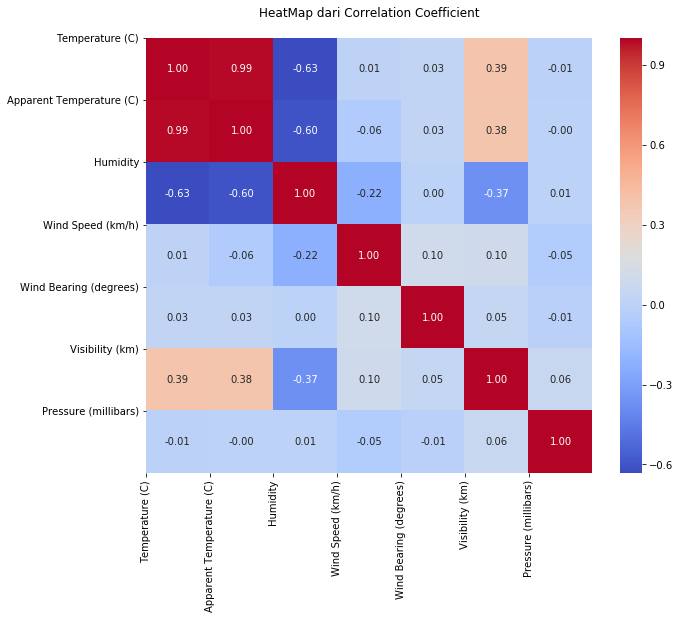

In [63]:
# mencari correlation coeficient

import seaborn as sns
import matplotlib.pyplot as plt

corr = dataprepro[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']].corr()
fig, ax = plt.subplots(figsize=(10, 8)) # Ukuran grafik

# Membuat Heat Map, yang bisa diberi anotasi dan nilai
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns) # Memberi label X
plt.yticks(range(len(corr.columns)), corr.columns) # Memberi label Y
plt.title("HeatMap dari Correlation Coefficient\n")

plt.show()

tujuan dilakukan visualisasi seperti diatas adalah untuk melihat korelasi antara attribut, tabel korelasi memiliki rentang 0 hingga 1 dimana 0 menunjukan tidak ada korelasi apapun dan 1 menunjukan korelasi kuat antara 2 attribut. berdasarkan tabel diatas dapat ditarik kesimpulan bahwa attirbut temperature dan apparent temperature memiliki korelasi yang kuat, yaitu 0.99

### Analisis regresi
analisis regresi dilakukan dengan menggunakan attirbut-attribut yang memiliki korelasi yang kuat. dan seperti yang telah kita ketahui bahwa attribut temperature dan apparent temperature memiliki korelasi yang kuat.

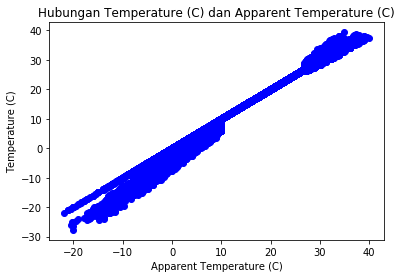

In [7]:
# display(dataprepro[['Temperature (C)']].describe(),dataprepro[['Apparent Temperature (C)']].describe())
x = dataprepro['Temperature (C)']
y = dataprepro['Apparent Temperature (C)']

x_data = x
y_data = y

plt.plot(x,y,"bo")
plt.title("Hubungan Temperature (C) dan Apparent Temperature (C)")
plt.ylabel("Temperature (C)")
plt.xlabel("Apparent Temperature (C)")
plt.show()

### Regresi Linier


In [8]:
# import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
import numpy as np

# melakukan setting random dengan seed 0
np.random.seed(0)

# data
x = dataprepro['Temperature (C)']
y = dataprepro['Apparent Temperature (C)']

# normalisasi data
Xdata = x/max(x)
Ydata = y/max(y)

# Membagi data menjadi training set (80%) dan testing set (20%)
msk = np.random.rand(len(x)) < 0.8

train_x = np.array(Xdata[msk]).reshape(-1,1)
test_x = np.array(Xdata[~msk]).reshape(-1,1)
train_y = np.array(Ydata[msk]).reshape(-1,1)
test_y = np.array(Ydata[~msk]).reshape(-1,1)

model = LinearRegression()
model.fit(train_x,train_y)

intercept = model.intercept_        # Menghitung Intersepsi (b0)
slope = model.coef_[0]              # Menghitung Slop (b1)
r_sq = model.score(train_x,train_y) # Menghitung hubungan variabel x dan y

pred_y = model.predict(test_x)

print('Intercept (Beta_0): {:0.2f}'.format(intercept[0]))
print('Slope (Beta_1)    : {:0.2f}'.format(slope[0]))
print('R-2 score         : {:0.2f}'.format(r_sq))

mae = mean_absolute_error(test_y, pred_y)  
mse = mean_squared_error(test_y, pred_y)
rmse = math.sqrt(mse)

# hasil disimpan pada dataframe
regresi = pd.DataFrame() # Membuat dataframe untuk menampung hasil
regresi["Linear"] = [mae,mse,rmse,r_sq]

Intercept (Beta_0): -0.06
Slope (Beta_1)    : 1.13
R-2 score         : 0.99


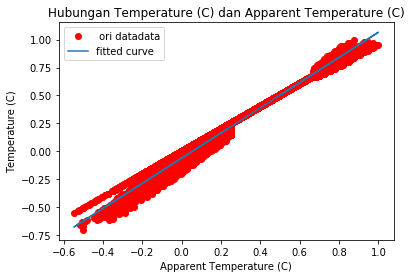

In [9]:
from scipy.optimize import curve_fit
# fungsi
def linier(x, a, b):
     y = b + a*x
     return y

popt1, pcov1 = curve_fit(linier, train_x.flatten(), train_y.flatten())
y_hat = linier(Xdata, *popt1)

# plotting
plt.plot(Xdata, Ydata, 'ro', label=' ori datadata')
plt.plot(Xdata, y_hat,  label='fitted curve')
plt.legend(loc='best')
plt.title("Hubungan Temperature (C) dan Apparent Temperature (C)")
plt.ylabel('Temperature (C)')
plt.xlabel('Apparent Temperature (C)')
plt.show()

dari hasil plotting kurva regresi linier diperoleh bentuk kurva yang bagus, menunjukan fitting yang dilakukan baik tidak under fitting atau over-fitting, data memiliki hubungan positif

## Analisis klasifikasi

### preprocessing
menentukan attribut dan class

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

feature_names = ['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
X = dataprepro[feature_names]
Y = dataprepro[['Summary']]

print(dataprepro['Summary'].unique())

# split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# scalling (normalisasi)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# hasil disimpan pada dataframe
classify = pd.DataFrame() # Membuat dataframe untuk menampung hasil

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']


### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

classify['K-NearestNeighbors'] = [knn.score(X_train, Y_train), knn.score(X_test, Y_test)]

Accuracy of K-NN classifier on training set: 0.66
Accuracy of K-NN classifier on test set: 0.49


### ANN

In [16]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='sgd',
                        max_iter=1000, random_state=80, learning_rate_init=0.001,
                        momentum=0.9)

mlp.fit(X_train, Y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(mlp.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(mlp.score(X_test, Y_test)))

classify['NeuralNetwork'] = [mlp.score(X_train, Y_train), mlp.score(X_test, Y_test)]

Accuracy of K-NN classifier on training set: 0.51
Accuracy of K-NN classifier on test set: 0.51


### SVM

In [13]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, Y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, Y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, Y_test)))

classify['SVM'] = [svm.score(X_train, Y_train), mlp.score(X_test, Y_test)]

Accuracy of SVM classifier on training set: 0.50
Accuracy of SVM classifier on test set: 0.50


### Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, Y_test)))

classify['NaiveBayes'] = [gnb.score(X_train, Y_train), mlp.score(X_test, Y_test)]

Accuracy of GNB classifier on training set: 0.44
Accuracy of GNB classifier on test set: 0.44


### Kesimpulan

In [17]:
# visualisasikan dalam tabel
classify.rename(index={0:'Training',1:'Testing'}, inplace=True)
display(classify)

index = classify.idxmax(axis = 1)

print("Classifier terbaik untuk data Train: {}".format(index[0]))
print("Classifier terbaik untuk data Test: {}".format(index[1]))

,K-NearestNeighbors,NeuralNetwork,SVM,NaiveBayes
Training,0.658244,0.509604,0.498346,0.444658
Testing,0.494204,0.510882,0.508547,0.508547


Classifier terbaik untuk data Train: K-NearestNeighbors
Classifier terbaik untuk data Test: NeuralNetwork


berdasarkan hasil akurasi pada percobaan training dan testing dengan menggunakan 4 clasifier diperoleh bahwa model terbaik untuk melakukan training  adalah KNN dan model terbaik untuk melakukan data testing adalah Neural Network